<a href="https://colab.research.google.com/github/sipocz/statistics/blob/main/Dist_Fitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=eb40b3c65b0681bf08ba44ad766b603fe73d711eb2572d82f76ac8fa2a8b74d1
  Stored in directory: /root/.cache/pip/wheels/2f/4b/12/1c9085f8ecb92805ca8645ab9c61703a2874685a9fb87b0bdb
Successfully built fitter


In [285]:
#fatiguelife': (1.8375353820619407, 1.4980054019828415, 1.9923652278446684)
#(1.859970300503974, -0.5084430499558525, 12.95240787129611)
#cauchy(8.61992851413854, 8.80746216128837)

In [286]:
def data_statistics(data_m):
    from statistics import median
    from statistics import mean, stdev
    
    print(f"Átlag: {mean(data_m)}")
    print(f"Szórás: {stdev(data_m)}")
    
    print(f"Minimum: {min(data_m)}")
    print(f"Maximum: {max(data_m)}")
    print(f"Median {median(data_m)}")
    print(f"Darabszám {len(data_m)}")
    


In [287]:
from scipy import stats
data_model = stats.fatiguelife.rvs(0.859970300503974, loc=0.01, scale=12.95240787129611, size=2000)
data_model_gen_masdor=stats.expon.rvs(0,scale=34,size=10000)
data_model_cauchy_masdor=stats.expon.rvs(8.6199,scale= 8.80746216128837,size=10000)

In [288]:

data_model_gen_masdor

array([56.83467674, 35.55692596,  3.97738985, ..., 12.74937672,
        5.74438188,  3.83340282])

In [289]:
data_statistics(data_model_cauchy_masdor)

Átlag: 17.286412308533887
Szórás: 8.799419625125324
Minimum: 8.621627950293249
Maximum: 114.22282174279883
Median 14.564029344039636
Darabszám 10000


In [290]:
data_statistics(data_model)

Átlag: 17.702257537175157
Szórás: 15.44719910432123
Minimum: 1.1814035684247162
Maximum: 133.27419942137004
Median 12.860067364547008
Darabszám 2000


In [291]:
from fitter import Fitter
f_model_gen_masdor = Fitter(data_model_gen_masdor,distributions=["fatiguelife","expon"],timeout=1560)
f_model_gen_masdor.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000012,1610.551703,-205416.879105,inf,0.009596,3.138244e-01
fatiguelife,0.000127,1544.537286,-181795.794040,inf,0.036951,2.677493e-12


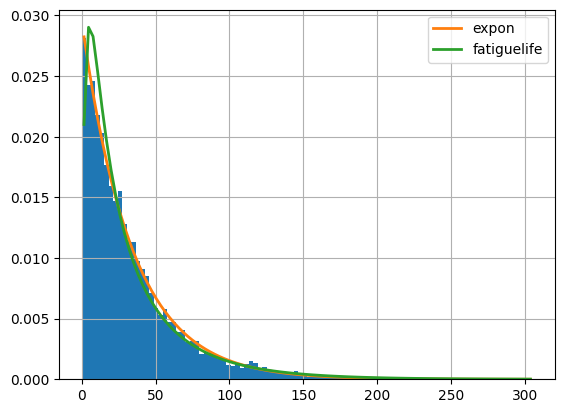

In [292]:
f_model_gen_masdor.summary(Nbest=2,)

In [293]:
data_statistics(data_model_gen_masdor)

Átlag: 33.86284859436176
Szórás: 34.14352622432564
Minimum: 0.002408995762142858
Maximum: 305.45819022339896
Median 23.652535368314616
Darabszám 10000


In [294]:
from fitter import Fitter
f_model = Fitter(data_model,distributions=["fatiguelife","expon"],timeout=1560)
f_model.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 20.77it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
fatiguelife,0.000312,1373.069522,-31326.593798,inf,0.013070,8.795522e-01
expon,0.002794,1364.476556,-26947.092906,inf,0.079425,2.018724e-11


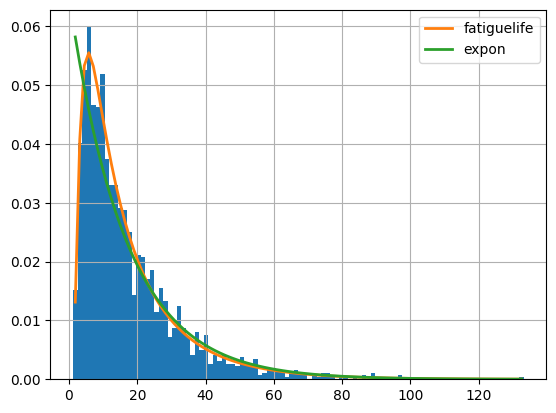

In [295]:
f_model.summary(Nbest=2,)

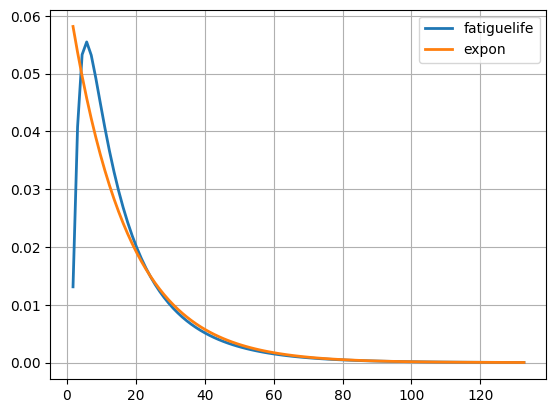

In [296]:
f_model.plot_pdf()

In [297]:
f_model.fitted_param

{'expon': (1.1814035684247162, 16.52085396875044),
 'fatiguelife': (0.8810729141003432, 0.05346163706724997, 12.709294660456104)}

In [298]:
data_masdor=[25.19999999,7.283333339,28,1.083333335,1.083333325,9.600000002,84.03333333,61.19999999,6.783333337,32.15,12.2,15.53333333,18.91666667,0.766666668,191.15
,272.1166667,271.5166667,1.249999999,1.566666666,18.91666667,23.86666666,11.10000001,92.23333333,153.2166667,71.81666667,43.71666667,0.916666671,14.9,9.766666676,11.34999999
,5.249999991,4.499999994,0,0,2.899999997,1.916666664,12.33333334,1.183333338,8.849999994,11.58333333,13.43333334,97.21666667,46.5,13.04999999,1.766666671,1.449999993
,2.799999994,6.149999992,1.699999999,21.26666666,4.450000003,9.366666666,1.699999999,75.73333333,4.299999999,1.766666671,9.833333327,16.66666667,43.60000001
,19.58333333,4.133333336,4.583333336,1.28333334,3.333333337,19.54999999,38.85,12.50000001,20.85,4.350000001,1.566666666,49.56666668,27.91666667,13.45,107.5833333
,1.450000004,1.433333333,172.95,2.200000001,19.8,61.45,175.3333333,22,68.39999999,210.4833333,12.2,20.4,1.616666667,21.61666667,9.633333333]

In [299]:
#data_masdor=[i for i in data_masdor if i<300 ]

In [300]:
#data_masdor=[i if i>0 else 1  for i in data_masdor]

In [301]:
data_statistics(data_masdor)

Átlag: 34.20861423206742
Szórás: 57.33712478300013
Minimum: 0
Maximum: 272.1166667
Median 12.2
Darabszám 89


In [302]:
len(data_masdor)

89

In [303]:
from fitter import Fitter
f_masdor_0 = Fitter(data_masdor[:44],bins=7,distributions=["fatiguelife","expon"]) #distributions=["fatiguelife","expon"]
f_masdor_0.fit()

f_masdor_1 = Fitter(data_masdor[44:],bins=7,distributions=["fatiguelife","expon"]) #distributions=["fatiguelife","expon"]
f_masdor_1.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 47.18it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000027,104.21378,-622.124406,inf,0.284471,0.001209
fatiguelife,0.000091,101.74759,-564.721828,inf,0.095967,0.776910


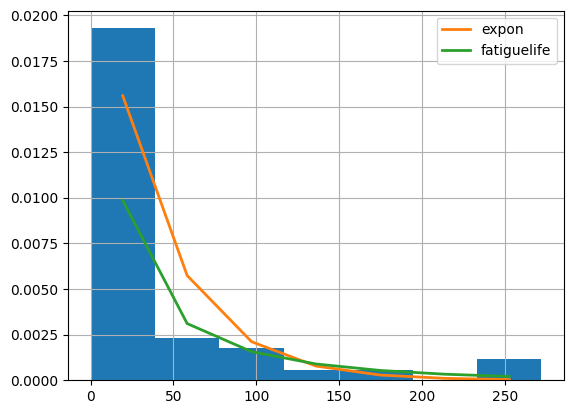

In [304]:
f_masdor_0.summary(Nbest=5,)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000055,102.505193,-605.197596,inf,0.290045,0.000758
fatiguelife,0.000259,99.940405,-531.522060,inf,0.136820,0.337459


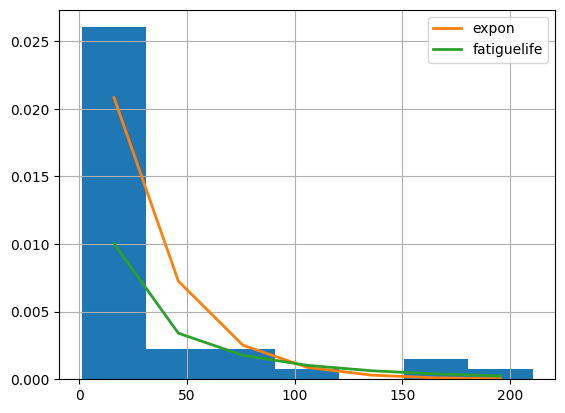

In [305]:
f_masdor_1.summary(Nbest=5,)

In [306]:
import scipy
dist=scipy.stats.expon
bounds=[(0,10)]
res=dist.fit(data_masdor)

In [307]:
res

(0.0, 34.20861423206741)

In [308]:
dist.pdf(res)

array([1.00000000e+00, 1.39119371e-15])

In [309]:
print(f_masdor_0.fitted_param["expon"])
print(f_masdor_1.fitted_param["expon"])

(0.0, 38.90795454718181)
(1.28333334, 28.330370361733337)


In [314]:
f_masdor_0.fitted_param["expon"]

(0.0, 38.90795454718181)

In [315]:
f_masdor_1.fitted_param["expon"]

(1.28333334, 28.330370361733337)

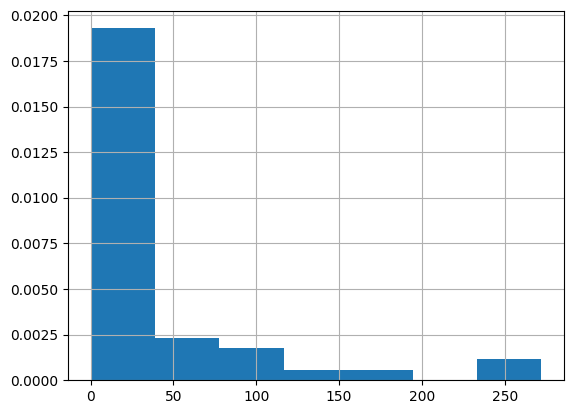

In [321]:
f_masdor_0.hist()

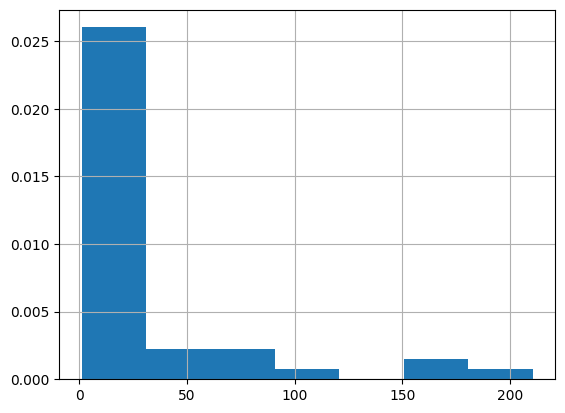

In [320]:
f_masdor_1.hist()

In [323]:
from math import log
data2=[log (i+0.001) for i in data_masdor]


In [324]:
from fitter import Fitter
f_norm = Fitter(data2)
f_norm.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions


Fitting 110 distributions: 100%|██████████| 110/110 [00:49<00:00,  2.20it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,0.948221,765.361130,-390.754632,inf,0.091903,0.414942
dweibull,0.951505,757.164033,-390.446925,inf,0.086561,0.490464
gennorm,0.957120,768.650127,-389.923287,inf,0.086527,0.490976
laplace,0.957290,762.237367,-394.396082,inf,0.087362,0.478731
gompertz,0.959315,inf,-389.719434,inf,0.105980,0.251878
laplace_asymmetric,0.971003,707.629422,-388.641606,inf,0.077709,0.627233
levy_stable,0.980092,1043.650887,-383.323792,inf,0.077563,0.629558
tukeylambda,0.981390,inf,-387.694652,inf,0.127613,0.100825
vonmises_line,0.984037,817.764346,-387.454871,inf,0.070884,0.735337
logistic,0.987157,809.622456,-391.661806,inf,0.069917,0.750266


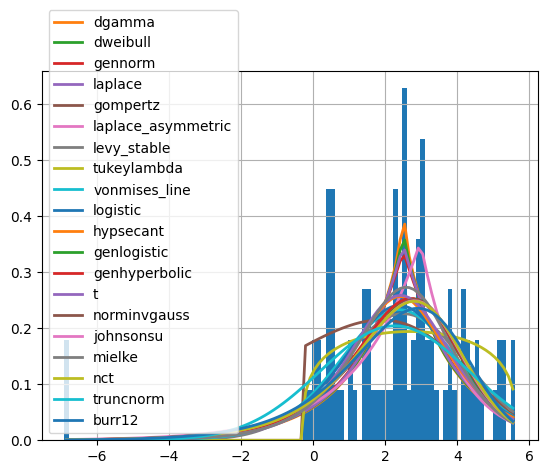

In [325]:
f_norm.summary(Nbest=20)

In [326]:
f_norm.fitted_param["norm"]

(2.2604519143351616, 2.0588261495685662)

In [327]:
from math import exp
exp(2.5277208598733774)


12.524927516812905

In [328]:
import pandas as pd

In [329]:
df=pd.DataFrame(data_masdor)

In [330]:
df.describe()

,0
count,89.000000
mean,34.208614
std,57.337125
min,0.000000
25%,2.900000
50%,12.200000
75%,28.000000
max,272.116667


In [331]:
df.mean()

0    34.208614
dtype: float64

In [333]:
data_weekly_awg=[80.59999999,43.02499999,15.9,77.47777778,1.73333333,103.6166667,3.48333333,16.52083334,78.27142857,12.94166666,38.68571428,12.27916667,13.55238095,10.11,74.80416667,14.37916666,13.11904762,28.93333333,11.20833334,9.533333332,5.950000003,10.68333334,1.983333325,21.35,8.114583334,30.22083333,26.1375,15.72619047,9.366666666,85.84166666,23.40833333,1.566666666,38.74166667,13.45,75.11666667,57.12333334,63.40714286,55.40833333,48.42222222,1.616666667,9.558333335,25.19999999,17.64166667,8.322222222,38.75333333,32.88333334,7.499999998,10.2,104.1833333,13.43333333,53.95,1.816666672,1.783333342,244.9277778,7.244444444,16.63333333,17.48333333,55.43888889,27.66111111,25.26666667,1.599999997]


In [334]:
from fitter import Fitter
f_norm = Fitter(data_weekly_awg)
f_norm.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions

Fitting 110 distributions: 100%|██████████| 110/110 [02:00<00:00,  1.09s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
loglaplace,0.003038,1383.278384,-592.010697,inf,0.105981,0.468023
ncx2,0.003205,1504.962652,-584.652236,inf,0.084830,0.740170
pearson3,0.003207,1489.875138,-588.713729,inf,0.088467,0.692883
geninvgauss,0.003209,1433.068034,-584.568578,inf,0.084008,0.750668
foldcauchy,0.003224,1371.028417,-588.389436,inf,0.099092,0.553543
halfcauchy,0.003224,1369.029153,-592.500295,inf,0.099092,0.553544
skewcauchy,0.003228,1362.543132,-588.321428,inf,0.099913,0.543050
lomax,0.003248,1413.612109,-587.947517,inf,0.097646,0.572194
genpareto,0.003248,1413.610519,-587.947459,inf,0.097646,0.572192
pareto,0.003248,1413.611203,-587.947453,inf,0.097646,0.572191


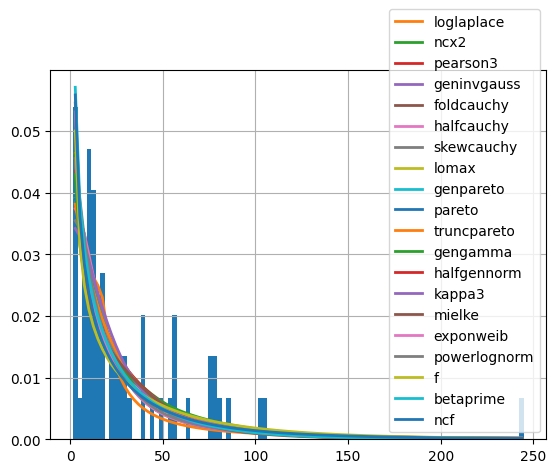

In [335]:
f_norm.summary(Nbest=20)

In [336]:
import pandas as pd
df=pd.DataFrame(data_weekly_awg)

<Axes: ylabel='Frequency'>

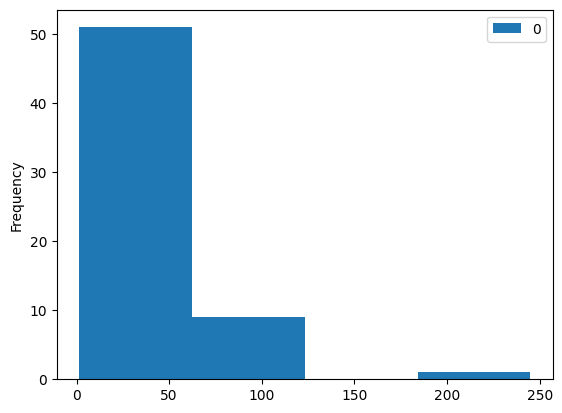

In [337]:
df.plot.hist(bins=4)

In [338]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = data_weekly_awg
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.693, p=0.000
Probably not Gaussian


In [339]:
data_ticket_time=[80.59999999 ,75.84999999, 10.2, 15.9, 20.91666667, 20.86666667, 190.65, 2.266666662, 1.549999996, 1.383333332, 155.4, 51.83333334, 3.48333333, 51.63333333, 3.283333336, 5.950000008, 5.216666671, 1.366666661, 38.85000001, 247.3333333, 215.4833333, 5.949999997, 14.9 ,24.01666666 ,25.4 ,9.766666676 ,11.34999999 ,5.249999991 ,25.56666666 ,10.1 ,182.7666667 ,36.45 ,4.499999994 ,10.35 ,1.066666665 ,1.983333336 ,2.899999997 ,14.95000001 ,29.28333333 ,18.9 ,21 ,1.916666664 ,12.33333334 ,2.13333334 ,3.500000001 ,35.08333333 ,3.699999995 ,1.183333338 ,25.23333333 ,8.849999994 ,11.58333333 ,27.71666667 ,160.85 ,13.43333334 ,97.21666667 ,4.833333332 ,46.5 ,12.86666667 ,32.83333333 ,13.04999999 ,1.73333333 ,1.766666671 ,1.449999993 ,5.949999997 ,2.799999994 ,6.149999992 ,49.51666666 ,1.699999999 ,21.26666666 ,4.450000003 ,9.366666666 ,1.699999999 ,75.73333333 ,450.1666667 ,4.299999999 ,29.30000001 ,1.100000006 ,10.13333333 ,1.766666671 ,2.066666668 ,9.833333327 ,23.78333333 ,10.21666667 ,8.066666666 ,3.833333339 ,10.68333334 ,1.983333325 ,16.66666667 ,5.18333333 ,43.60000001 ,33.84999999 ,7.450000002 ,10.75 ,19.58333333 ,4.133333336 ,4.583333336 ,1.28333334 ,1.699999999 ,3.333333337 ,19.54999999 ,50.08333333 ,38.85 ,30.63333334 ,1.316666671 ,12.50000001 ,20.85 ,69.33333333 ,1.866666663 ,13.4 ,5.816666664 ,34.43333334 ,4.350000001 ,9.833333327 ,36.48333333 ,5.766666663 ,9.366666666 ,171.5333333 ,0.149999993 ,11.38333333 ,35.43333333 ,1.566666666 ,49.56666668 ,27.91666667 ,13.45 ,75.11666667 ,107.5833333 ,1204.966667 ,172.95 ,1.433333333 ,1.450000004 ,2.200000001 ,122.3333333 ,108.3333333 ,79.3 ,90.11666666 ,12.26666667 ,27.63333334 ,3.866666659 ,6.533333331 ,41.68333333 ,19.8 ,940.0333333 ,940.1666667 ,27.65000001 ,61.45 ,175.3333333 ,19.63333333 ,2.400000006 ,22 ,29.46666667 ,68.39999999 ,50.81666666 ,210.4833333 ,12.2 ,961.25 ,20.4 ,1.616666667 ,1.816666662 ,11.03333334 ,21.61666667 ,12.2 ,12.43333334 ,3.733333336 ,4.000000003 ,9.633333333 ,25.19999999 ,7.283333339 ,28 ,22.80000001 ,1.083333335 ,1.083333325 ,9.600000002 ,84.03333333 ,61.19999999 ,6.783333337 ,32.15 ,53.56666667 ,12.2 ,9.066666659 ,5.933333337 ,10.26666666 ,10.13333333 ,104.1833333 ,21.58333333 ,15.53333333 ,3.666666665 ,12.95 ,142.1666667 ,18.91666667 ,0.766666668 ,1.816666672 ,1.783333342 ,191.15 ,272.1166667 ,271.5166667 ,1.249999999 ,1.566666666 ,18.91666667 ,16.63333333 ,23.86666666 ,11.10000001 ,11.16666667 ,92.23333333 ,2.18333333 ,153.2166667 ,71.81666667 ,2.016666667 ,59.18333333 ,16.1 ,7.699999998 ,1.149999996 ,4.683333338 ,81.26666666 ,9.233333333 ,15.65 ,43.71666667 ,68.31666667 ,2.466666667 ,0.916666671 ,1.599999997 ]

In [340]:
len(data_ticket_time)

220

In [341]:
from statsmodels.tsa.stattools import adfuller
_, p, _, _, _, _ = adfuller(data_ticket_time)
print(f'p={p}')


p=3.943738413189298e-21


In [342]:
pip install distfit   #distfit modul telepítése

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [343]:
from distfit import distfit  # a distfit modul importja 
import pandas as pd  # pandas modul installációja, ez a colab rendszer alapmodulja között fenn van nem igényel telepítést

In [344]:
#MASDOR adatok 
data_masdor=[25.19999999,7.283333339,28,1.083333335,1.083333325,9.600000002,84.03333333,61.19999999,6.783333337,32.15,12.2,15.53333333,18.91666667,0.766666668,191.15
,272.1166667,271.5166667,1.249999999,1.566666666,18.91666667,23.86666666,11.10000001,92.23333333,153.2166667,71.81666667,43.71666667,0.916666671,14.9,9.766666676,11.34999999
,5.249999991,4.499999994,0,0,2.899999997,1.916666664,12.33333334,1.183333338,8.849999994,11.58333333,13.43333334,97.21666667,46.5,13.04999999,1.766666671,1.449999993
,2.799999994,6.149999992,1.699999999,21.26666666,4.450000003,9.366666666,1.699999999,75.73333333,4.299999999,1.766666671,9.833333327,16.66666667,43.60000001
,19.58333333,4.133333336,4.583333336,1.28333334,3.333333337,19.54999999,38.85,12.50000001,20.85,4.350000001,1.566666666,49.56666668,27.91666667,13.45,107.5833333
,1.450000004,1.433333333,172.95,2.200000001,19.8,61.45,175.3333333,22,68.39999999,210.4833333,12.2,20.4,1.616666667,21.61666667,9.633333333]

In [345]:
data_masdor=[i for i in data_masdor if i <20]   # a 20 percnél kisebb jegyfelvétellel foglalkozzunk 

In [346]:
dfit = distfit(method="parametric", todf=True)  # a distfit objektum létrehozása

In [347]:
df=pd.DataFrame(data_masdor[:],columns=["data_masdor"])  # a megfelelő dataframe előállítása a listából 

In [348]:
dfit.bins=int(math.sqrt(len(data_masdor)))     # az ismert gyökös kifejezés segítségével határozzuk meg a bin-ek számát, magyarul az osztályközöket
result=dfit.fit_transform(df["data_masdor"], verbose=20, )          # illesztjük az adatokra az eloszlásföggvényeket, az információk kiírásra kerülnek 

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.011585] [loc=7.114 scale=6.011]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00344837] [loc=0.000 scale=7.114]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 0.00344837] [loc=-268435456.000 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.24 sec] [RSS: 0.00705417] [loc=7.873 scale=6.110]
[distfit] >INFO> [t         ] [1.69 sec] [RSS: 0.0115841] [loc=7.114 scale=6.011]
[distfit] >INFO> [genextreme] [1.96 sec] [RSS: 0.00461468] [loc=3.193 scale=3.282]
[distfit] >INFO> [gamma     ] [1.32 sec] [RSS: 0.00323125] [loc=-0.000 scale=7.266]
[distfit] >INFO> [lognorm   ] [1.10 sec] [RSS: 0.00405527] [loc=-0.584 scale=5.246]
[distfit] >INFO> [beta      ] [1.38 sec] [RSS: 0.0057075] [loc=-0.000 scale=20.291]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00956459] [loc=0.000 scale=19.800]
[distfit] >INFO> [loggamma  ] [1.03 sec] [RSS: 0.0114945] [loc=-1766.616 scale=241.310]
[distfit] >INFO>

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Gamma(loc:-0.000000, scale:7.265529)


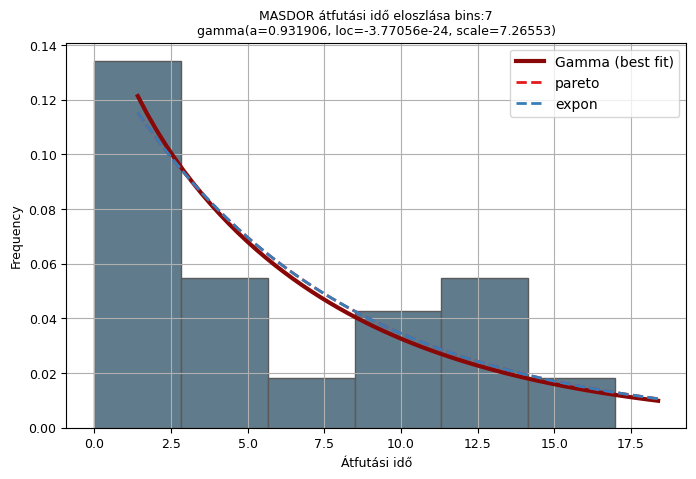

In [349]:
# elkészítjük a grafikont
plotted=dfit.plot(chart="pdf",figsize=(8,5),xlabel="Átfutási idő",
                          n_top=2,
                          fontsize=9,
                          title="MASDOR átfutási idő eloszlása bins:"+str(dfit.bins),
                          cii_properties= None,
                          emp_properties= None)



(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'MASDOR átfutási idő eloszlása\ngamma(a=0.931906, loc=-3.77056e-24, scale=7.26553)'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>)

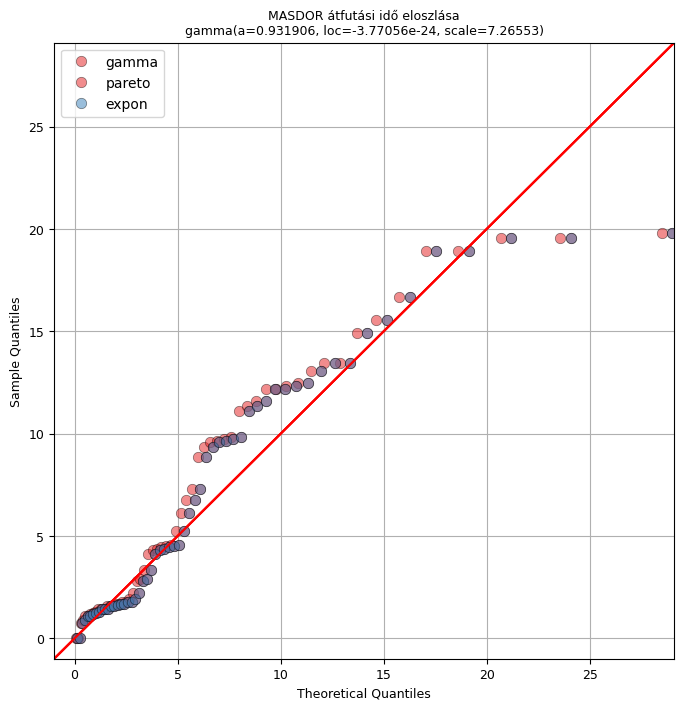

In [350]:
dfit.qqplot(df["data_masdor"],
            figsize=(8,8),
            n_top=3,
            fontsize=9,
            title="MASDOR átfutási idő eloszlása",
            
            
            )

(<Figure size 2500x1200 with 1 Axes>,
 <Axes: title={'center': '\ngamma(a=0.931906, loc=-3.77056e-24, scale=7.26553)'}, xlabel='x-axes', ylabel='y-axes'>)

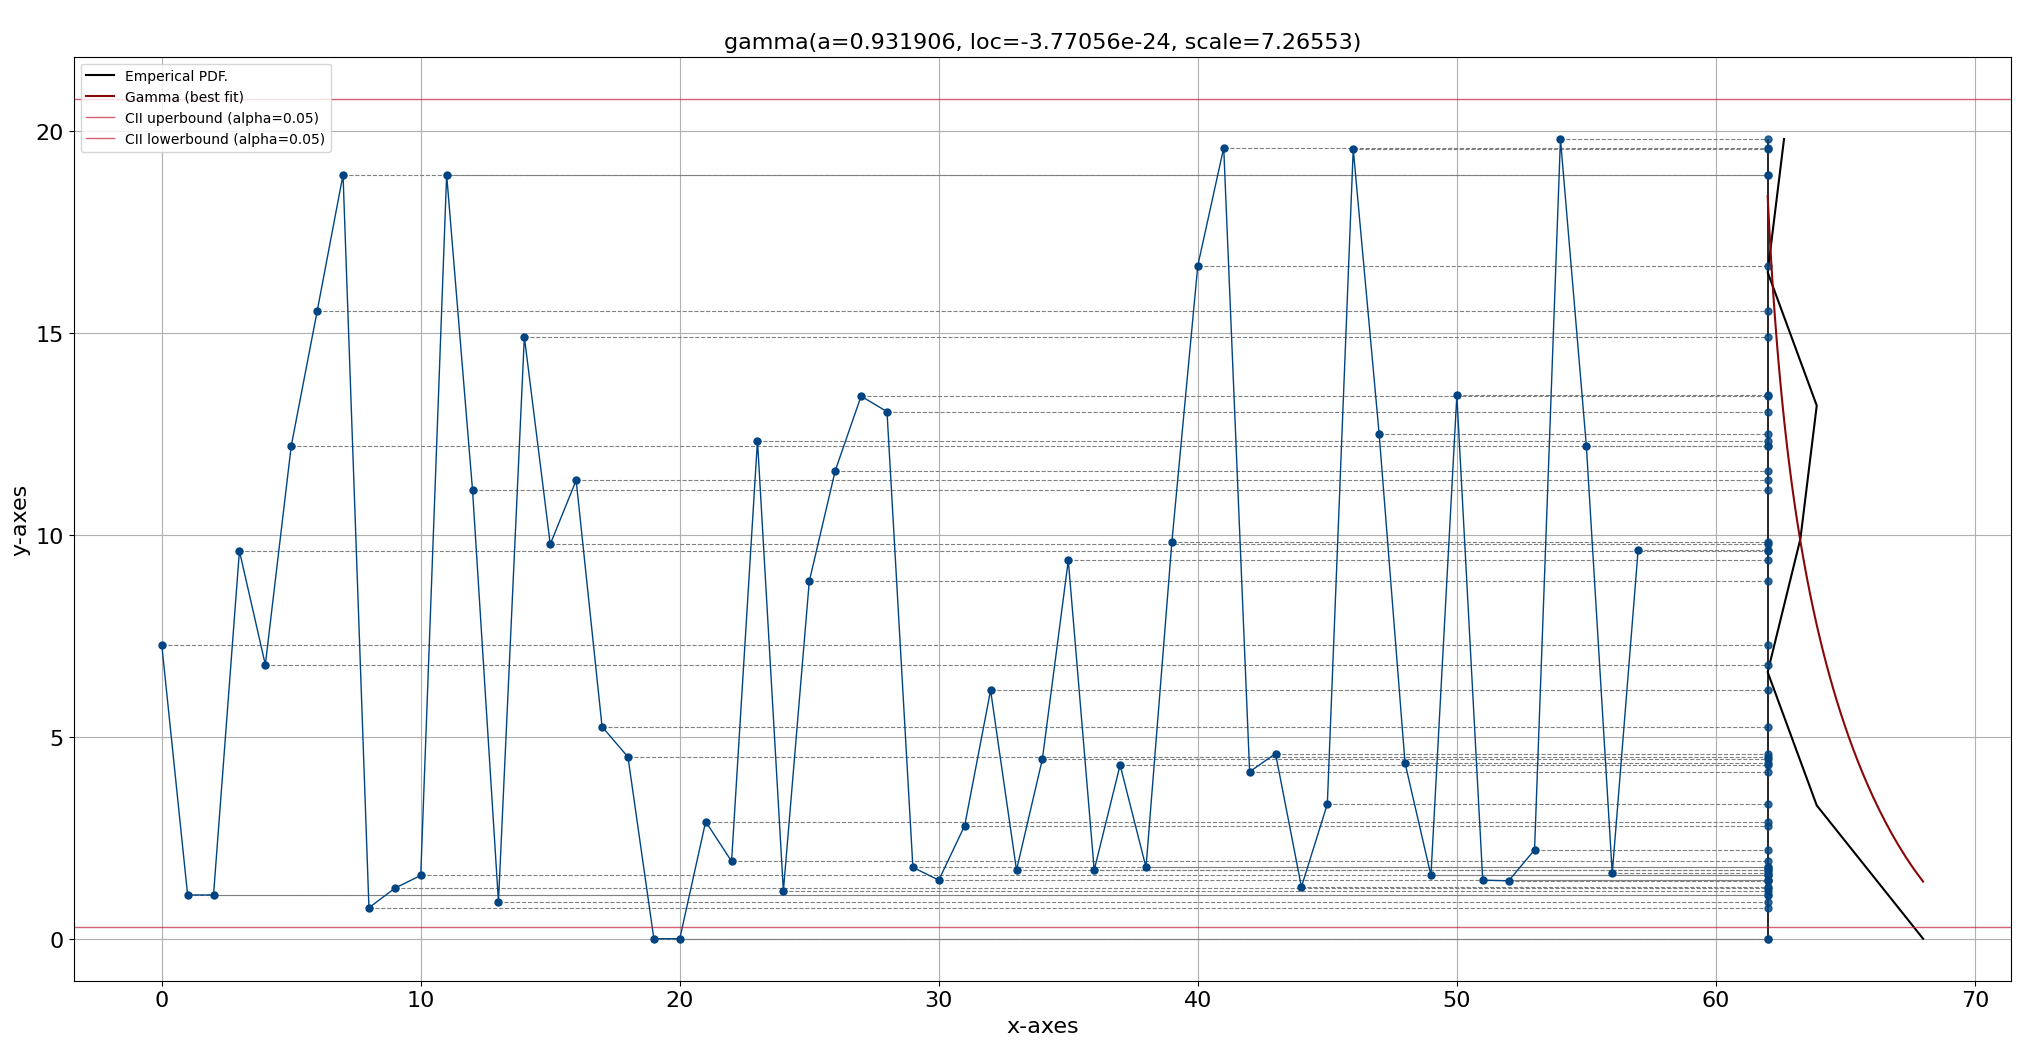

In [351]:
dfit.lineplot(df["data_masdor"])

In [352]:
gen=dfit.generate(5000)

[distfit] >INFO> Create Synthetic data for 5000 gamma distributed samples with fitted params (0.9319063231382194, -3.770561555243238e-24, 7.265528943339524).


In [353]:
gen.mean()

6.72128401382548

In [354]:
gen.min()

0.0006942706333752993

In [355]:
gen.view()

array([ 9.92945833,  8.6304507 ,  0.79553   , ..., 14.20275331,
        0.88304339,  9.56520385])

In [ ]:
#teljes átfutási idő vizsgálata

In [356]:
import pandas as pd


In [357]:
it_atfutas=[13.38333333,85.25,27.46666666,8.966666667,29.76666667,2.966666669,2.58333333,11.41666666,85.76666666,63.96666667,8.883333335,33.73333334,57.95,42,11.39999999,83.08333333,14.04999999,13.16666666,169.0833333,17.36666666,94.61666667,20.73333333,4.933333334,10.21666667,4.033333333,194.8666667,273.5833333,272.7333333,3.050000001,2.916666667,21.5,
            27.1,27.18333334,95.36666666,155.3,88.15000001,8.033333325,63.5,12.14999999,6.749999996,6.416666668,88.86666666,3.233333335,44.31666666,70.48333334,4.016666673,16.05,80.18333333,16.99999999,71.51666666,37.83333333,43.4,197.65,35.08333333,5.999999999,64.43333333,92.1,81.31666667,148.5333333,144.4166667,44.78333334,10.46666666,22.03333334,
            26.84999999,161.0333333,12.26666667,13.88333333,6.149999992,187.7,185.5333333,7.283333328,1.966666665,325.1166667,37.78333333,4.816666672,39.31666667,6.833333328,4.033333333,35.83333333,63.45,7.633333326,18.53333334,35.68333332,27.41666666,3.650000005,13.98333333,12.98333334,5.316666673,55.58333333,5.333333333,2.983333329,25.86666667,
            15.26666666,12.91666666,28.68333333,164.9833333,14.68333334,105.3833333,325.1666667,50.03333334,41.66666666,13.28333333,2.116666669,2.066666668,1.816666662,3.216666664,6.466666659,1.783333331,1.983333336,21.48333333,4.683333338,9.733333325,2.033333327,75.98333333,4.433333332,32.73333334,1.400000002,10.58333333,2.466666667,10.11666666,
            24.11666666,10.41666667,4.066666674,10.88333334,14.61666667,3.149999992,17.25,5.516666668,45.30000001,34.29999999,11.36666667,19.9,4.400000002,4.900000003,1.533333336,2.033333337,0.283333337,3.716666666,20.31666666,39.13333333,1.166666667,12.75,21.00000001,76.45,2.266666662,14.15,6.283333325,34.83333334,4.566666665,10.25,36.6,33.21666666,
            33.6,172.15,0.816666659,11.8,35.8,1.949999995,49.93333333,28.3,13.66666667,75.50000001,107.95,1.783333342,1.716666659,173.2166667,2.549999999,122.8333333,118.6833333,79.55,90.41666666,12.53333334,28.01666667,4.183333326,6.950000001,41.9,20.13333334,62.11666667,181.2166667,19.91666667,22.23333333,68.7,210.7833333,12.40000001,153.7,20.65000001,
            1.916666664,11.43333333,21.91666667,12.56666667,82.73333333,9.783333336]

In [358]:
df_it_atfutas=pd.DataFrame(data=it_atfutas,columns=["it_atfutas"])

In [359]:
df_it_atfutas["it_atfutas"].mean()

44.06154513740105

In [360]:
import math
bins=int(math.sqrt(len(it_atfutas)))

In [361]:
dfit_it_atfutas = distfit(method="parametric", todf=True)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [pareto ] [0.00 sec] [RSS: 2.55787e-05] [loc=-42.785 scale=43.068]
[distfit] >INFO> [lognorm] [0.56 sec] [RSS: 4.24877e-05] [loc=0.078 scale=18.128]
[distfit] >INFO> [expon  ] [0.00 sec] [RSS: 0.000231467] [loc=0.283 scale=43.778]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Pareto(loc:-42.785106, scale:43.068440)


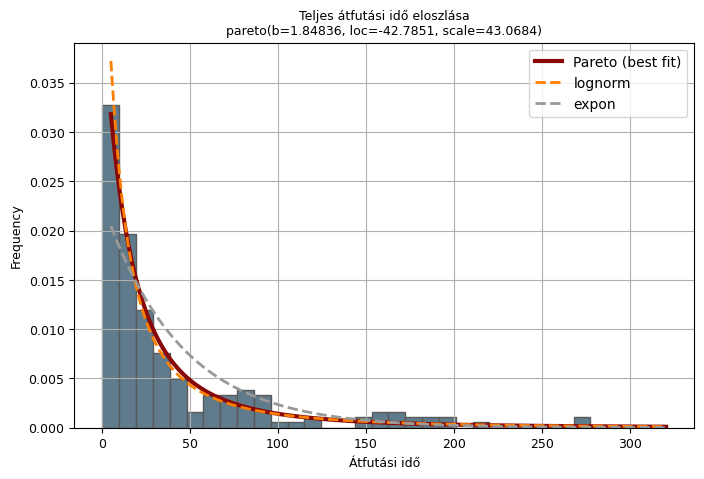

In [362]:
#dfit_it_atfutas.distr=["expon"]
dfit_it_atfutas.bins=34#bins
dfit_it_atfutas.distr=["pareto","lognorm","expon"]  # lognorm  volt
dfit_it_atfutas.fit_transform(df_it_atfutas["it_atfutas"],)
a, b=dfit_it_atfutas.plot(chart="pdf",figsize=(8,5),xlabel="Átfutási idő",
                          n_top=15,
                          fontsize=9,
                          title="Teljes átfutási idő eloszlása",
                          cii_properties= None,
                          emp_properties= None,)  # { 'color': '#000000','linewidth': 1,'linestyle': '-' }

[distfit] >INFO> Create cdf plot for the parametric method.
[distfit] >INFO> Ploting CDF


(<Figure size 600x300 with 1 Axes>,
 <Axes: title={'center': '\npareto(b=1.84836, loc=-42.7851, scale=43.0684)'}, xlabel='Values', ylabel='Frequency'>)

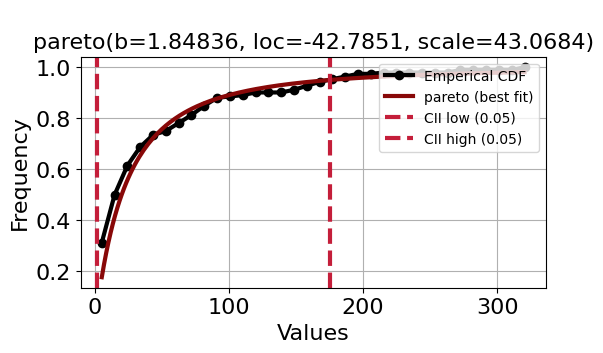

In [363]:
dfit_it_atfutas.plot(chart="cdf",figsize=(6,3),)

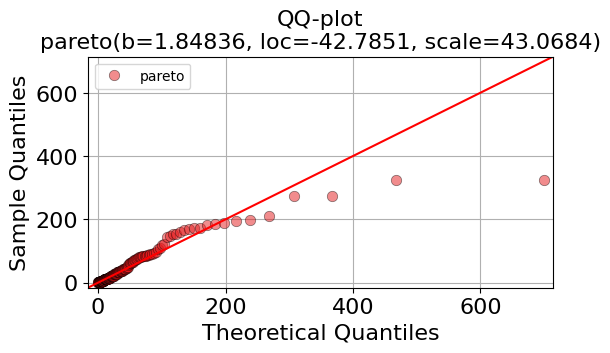

In [364]:
dfit_it_atfutas.qqplot(df_it_atfutas["it_atfutas"],figsize=(6,3),);

In [365]:
log_it_atfutas=[math.log(i) for i in it_atfutas]

In [366]:
df_log_it_atfutas=pd.DataFrame(log_it_atfutas, columns=["log_it_atfutas"])

In [367]:
dfit_log_it_atfutas = distfit(method="parametric", todf=True)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.0146681] [loc=2.909 scale=1.422]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:2.909230, scale:1.421619)


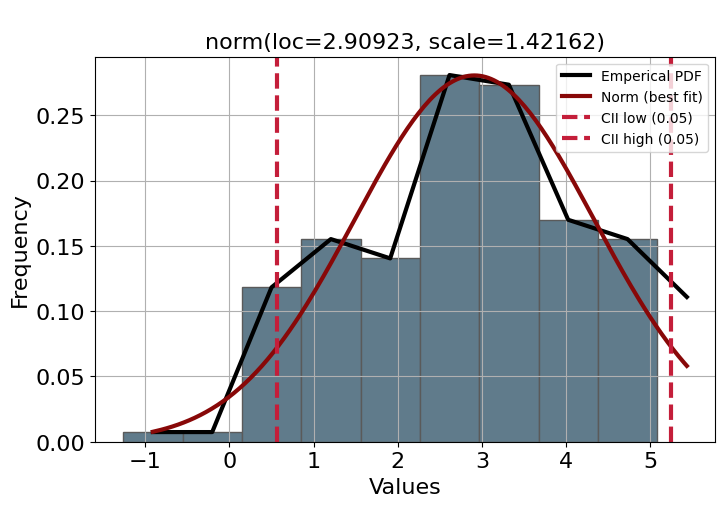

In [368]:
#dfit_it_atfutas.distr=["expon"] 
dfit_log_it_atfutas.distr=["norm"] 
dfit_log_it_atfutas.fit_transform(df_log_it_atfutas["log_it_atfutas"],)

plotted=dfit_log_it_atfutas.plot(chart="pdf",figsize=(8,5))

[distfit] >INFO> Create cdf plot for the parametric method.
[distfit] >INFO> Ploting CDF


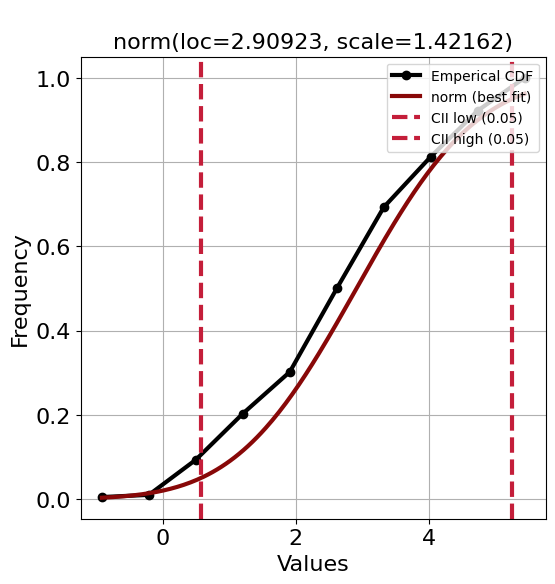

In [369]:
plotted=dfit_log_it_atfutas.plot(chart="cdf",figsize=(6,6),)

In [370]:
df_log_it_atfutas["log_it_atfutas"].mean()

2.9092295568427584

22.311265809694454

In [ ]:
## generátorok

In [377]:
df_model=distfit(method="parametric",)

In [378]:
import numpy as np


In [379]:
x = np.linspace(0,100, 100)

In [380]:
from scipy.stats import expon
expon.pdf(x,6.52,1/6.52)

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.79831366e-001,
       2.48120930e-004, 3.42342925e-007, 4.72344992e-010, 6.51714333e-013,
       8.99197788e-016, 1.24066116e-018, 1.71179260e-021, 2.36183255e-024,
       3.25872011e-027, 4.49619375e-030, 6.20358840e-033, 8.55935291e-036,
       1.18097007e-038, 1.62943428e-041, 2.24819929e-044, 3.10193550e-047,
       4.27987141e-050, 5.90511933e-053, 8.14754253e-056, 1.12415085e-058,
       1.55103840e-061, 2.14003319e-064, 2.95269417e-067, 4.07395684e-070,
       5.62101030e-073, 7.75554530e-076, 1.07006534e-078, 1.47641434e-081,
       2.03707121e-084, 2.81063318e-087, 3.87794930e-090, 5.35057042e-093,
       7.38240797e-096, 1.01858201e-098, 1.40538061e-101, 1.93906298e-104,
       2.67540708e-107, 3.69137214e-110, 5.09314203e-113, 7.02722315e-116,
       9.69575655e-119, 1.33776448e-121, 1.84577015e-124, 2.54668702e-127,
       3.51377164e-130, 4

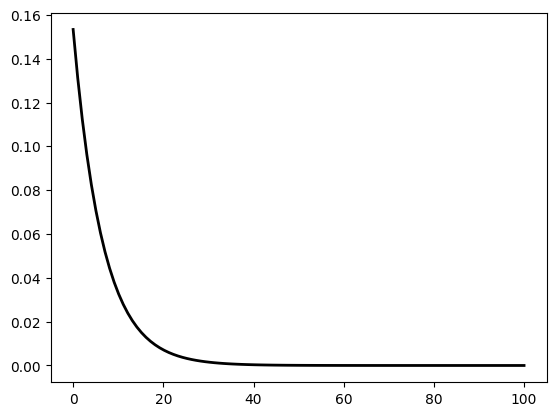

In [381]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
masdor_model = expon(0,6.52)
ax.plot(x, masdor_model.pdf(x), 'k-', lw=2, label='frozen pdf')


Text(0.5, 1.0, 'generált adatok')

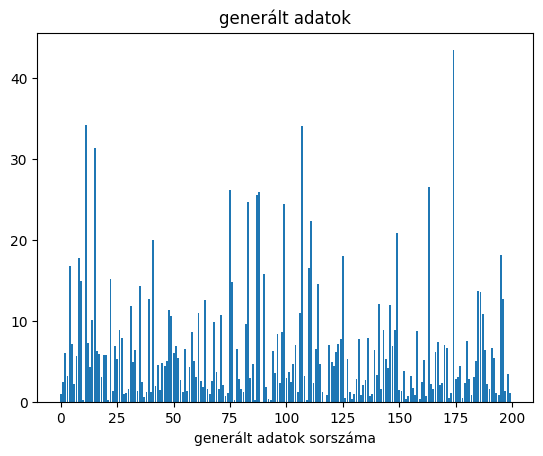

In [382]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x_model = np.linspace(0,199,200)
model_random_values = masdor_model.rvs(size=200)
plt.bar(x_model,height=model_random_values,lw=2, label='frozen pdf',)
plt.xlabel("generált adatok sorszáma")
plt.title("generált adatok")